core           INFO 	Loading data for Dutch Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '16', '44', '11', '14', '4', '55', '31', '18', '10', '23', '47', '5', '20', '24', '3', '6', '77', '22']


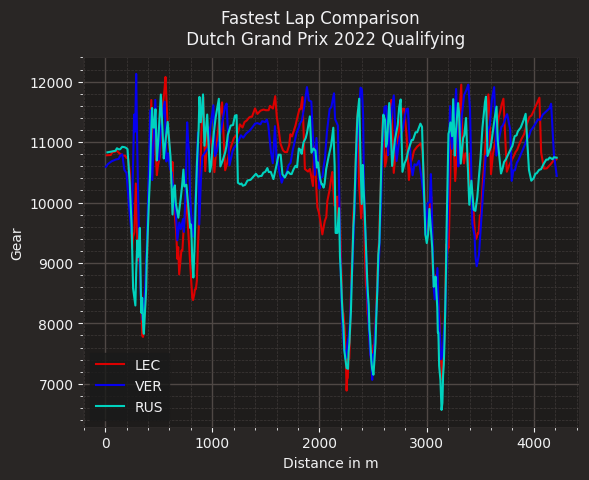

In [43]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt

ff1.Cache.enable_cache('./cache')  

plotting.setup_mpl()


# Magyar, %-ban mennyi a pit-ben %-ban
# Hány km-t ment

session = ff1.get_session(2022, 'Dutch', 'R')
session.load()
lec = session.laps.pick_driver('LEC').pick_fastest()
ver = session.laps.pick_driver('VER').pick_fastest()
rus = session.laps.pick_driver('RUS').pick_fastest()

lec_tel = lec.get_car_data().add_distance()
ver_tel = ver.get_car_data().add_distance()
rus_tel = rus.get_car_data().add_distance()

fer_color = ff1.plotting.team_color('FER')
rbr_color = ff1.plotting.team_color('RBR')
mer_color = ff1.plotting.team_color('MER')
#mer_color = fastf1.plotting.team_color('MER')

fig, ax = plt.subplots()
ax.plot(lec_tel['Distance'], lec_tel['RPM'], color=fer_color, label='LEC')
ax.plot(ver_tel['Distance'], ver_tel['RPM'], color=rbr_color, label='VER')
ax.plot(rus_tel['Distance'], rus_tel['RPM'], color=mer_color, label='RUS')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Gear')

""" twin = ax.twinx()
twin.plot(lec_tel['Distance'], lec_tel['nGear'], '--', color='white')
twin.plot(ver_tel['Distance'], ver_tel['nGear'], '--', color='yellow')
twin.plot(rus_tel['Distance'], rus_tel['nGear'], '--', color='cyan')
twin.set_ylabel("Gear")
 """
ax.legend()
plt.Figure(dpi=1200)
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")
plt.show()


core           INFO 	Loading data for Hungarian Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '55', '11', '16', '4', '14', '31', '5', '18', '10', '24', '47', '3', '20', '23', '6', '22', '77']


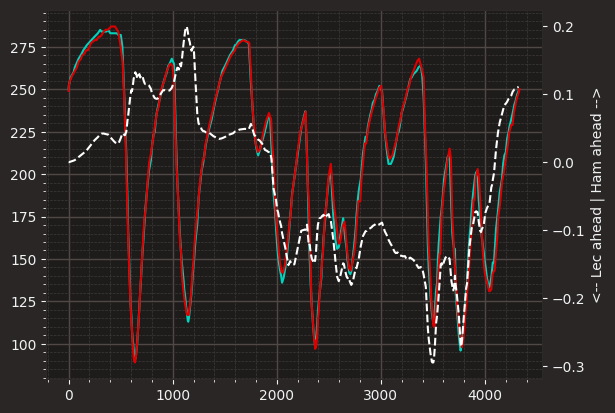

In [38]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt

ff1.Cache.enable_cache('./cache')  

plotting.setup_mpl()


# Magyar, %-ban mennyi a pit-ben %-ban
# Hány km-t ment

session = ff1.get_session(2022, 'Hungarian', 'R')
session.load()
lec = session.laps.pick_driver('LEC').pick_fastest()
ham = session.laps.pick_driver('HAM').pick_fastest()

delta_time, ref_tel, compare_tel = utils.delta_time(ham, lec)
# ham is reference, lec is compared

fig, ax = plt.subplots()
# use telemetry returned by .delta_time for best accuracy,
# this ensure the same applied interpolation and resampling
ax.plot(ref_tel['Distance'], ref_tel['Speed'],
        color=plotting.team_color(ham['Team']))
ax.plot(compare_tel['Distance'], compare_tel['Speed'],
        color=plotting.team_color(lec['Team']))

twin = ax.twinx()
twin.plot(ref_tel['Distance'], delta_time, '--', color='white')
twin.set_ylabel("<-- Lec ahead | Ham ahead -->")
plt.show()